# **Multilayer Perceptron: A Mathematical Implementation of a Neural Network**

### **Table of Contents**

##### - [ 1 - Overview and Goal](#1)
##### - [ 2 - Mathematical Formulation of MLP](#2)

## **1 - Overview and Goal** 

A Multilayer Perceptron (MLP) is a class of neural network that consists of an input layer, one or more hidden layers, and an output layer, where each layer is composed of neurons. An MLP is a feedforward network, meaning data flows from the input layer → hidden layers → output layer. It is also fully connected, meaning each neuron in one layer is connected to every neuron in the next layer.

Neural networks are trained using two main steps:

1. Forward propagation: passing inputs through the network to compute outputs.

2. Backward propagation: computing gradients and updating parameters (weights and biases) to reduce error.

**The goal of this notebook is to implement an MLP with:**
- Two input neurons

- One hidden layer with two neurons

- One output neuron

**The implementation will be in Python, and using NumPy only, and will include:**

- Forward propagation

- Backward propagation

- Parameter updates

- Training and evaluation

**Notebook Approch:**

- This notebook is organized step by step: first the concepts and mathematics, then the code implementation, and finally the training and evaluation.

## **2 - Mathematical Formulation of MLP**

### **2.1 - MLP as a Composition of Functions**

Mathematically, an MLP can be written as a composition of functions:
$$
\text{output} = F(x) = f_n(f_{n-1}(\dots f_1(x) \dots))
$$
where:

- $F$ is the function of the whole network
- $x$ is the input to the network
- $f$ is a layer, defined as a function
- $n$ is the number of layers

Each layer function is defined as:

$$
f(h) = \sigma(Wh + b)
$$

where:

- $h$ is the input to the layer  
- $\sigma$ is the activation function  
- $W$ and $b$ are the weights and biases of the layer


### **2.2 - Foward Propigation**

Now that the general formulation of an MLP has been introduced, let’s apply it to our specific network with 2 input neurons, 1 hidden layer of 2 neurons, and 1 output neuron. Forward propagation is the training step that starts from feeding the data to the network until the output and calculating the error of the output.

In this step, since we have two input neurons, the network input will be a matrix of data of size $n \times 2$:

$$
X = \begin{bmatrix} 
x_{11} & x_{21} \\ 
x_{12} & x_{22} \\ 
x_{13} & x_{23} \\ 
\vdots & \vdots \\ 
x_{1n} & x_{2n} 
\end{bmatrix},
$$

where $n$ is the number of samples and each row represents a sample and each column a feature score, and this matrix will be passed to the hidden layer, where each neuron will handel one column .

A weight matrix and a bias vector will be initialized in the hidden layer with random numbers:

$$
W_1 =
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix}, 
\quad
b_1 =
\begin{bmatrix}
b_{11} & b_{12}
\end{bmatrix}.
$$

For the output layer:
$$
W_2 =
\begin{bmatrix}
w_{1} \\
w_{2}
\end{bmatrix}, 
\quad
b_2 = \text{ (scalar)}
$$

Per sample, each hidden neuron will perform a dot product between a row from the input matrix and a column from the weight matirx:

$$
\text{output} = x_n \cdot w_n
$$

The dot product allows each neuron to calculate the relevance of the input data to its weights, that is, it measures the similarity or alignment between its weights and the input it receives. This concept of the dot product is important and will be discussed in greater depth later. After calculating the dot product, a bias term is added:

$$
Z = \text{dot product output} + b
$$

This allows the network to adjust the sensitivity and threshold of each neuron before activation. The resulting values are the outputs of the hidden layer, denoted by $Z$. Thus, the formulas for the input to each hidden neuron represent an affine combination as follows:


$$
Z_1^{[1]} = w_{11}^{[1]} x_1 + w_{12}^{[1]} x_2 + b_{11} \quad = \quad Z^{[1]} = X W_1 + b_1
$$

$$
Z_2^{[1]} = w_{21}^{[1]} x_1 + w_{22}^{[1]} x_2 + b_{12} \quad\\\ = \quad Z^{[1]} = X W_1 + b_1
$$


The superscript $[1]$ indicates the layer number, while the subscript indicates which neuron it is in that layer and, for weights, which input it corresponds to. 

For example:
* $Z_1^{[1]}$ → neuron 1 in layer 1
* $w_{12}^{[1]}$ → weight connecting input 2 to neuron 1 in layer 1



Rectified Linear Unit (ReLU) will be used as the activation function. It receives the output of the hidden layer $Z$ as its input and activates each neuron based on the following rule:

$$
a_i = \text{ReLU}(Z_i) =
\begin{cases} 
Z_i, & \text{if } Z_i > 0 \\
0, & \text{if } Z_i \le 0
\end{cases}
$$

This breaks the linearity of the network by allowing neuron outputs to suddenly flatten to zero whenever the pre-activation $Z_i$ is negative. This non-linear behavior enables the network to model complex, non-linear relationships in the data.

The full output of the hidden layer after activation is:

$$
a_1^{[1]} = \text{ReLU}(Z_1), \quad
a_2^{[1]} = \text{ReLU}(Z_2)
$$


Now that we have the outputs of the hidden layer after activation, $a_1^{[1]}$ and $a_2^{[1]}$, these will act as inputs to the final output layer of the network. New vectors of weights and biases will be initialized randomly, just like in the hidden layer.

The pre-activation output of the output neuron is calculated as an affine combination of the hidden layer activations:



$$
Z^{[2]} = w_{1}^{[2]} a_1^{[1]} + w_{2}^{[2]} a_2^{[1]} + b^{[2]}\quad =  \quad Z^{[2]} = A^{[1]} W_2 + b_2
$$

Since this network is designed for a binary classification task, the sigmoid function is applied as the activation function in the output layer. The sigmoid compresses the pre-activation output into a value between 0 and 1:

$$
a^{[2]} = \sigma(Z^{[2]}) = \frac{1}{1 + e^{-Z^{[2]}}}
$$

Here, $a^{[2]}$ represents the predicted probability that the input belongs to the positive class (class 1).

Finally, the prediction $\hat{y}$ is obtained by applying a decision rule:

$$
\hat{y} =
\begin{cases}
1, & \text{if } a^{[2]} \geq 0.5 \\
0, & \text{if } a^{[2]} < 0.5
\end{cases}
$$

In this binary classification setting, 0 corresponds to 0% probability of belonging to class 1, and 1 corresponds to 100% probability of belonging to class 1.



Now that we have a prediction \$\hat{y}\$ from our network, we need to determine how wrong the prediction is in order to facilitate learning. This constitutes the final step in forward propagation. To quantify this error, a loss function $\mathcal{L}$ is used to compare the predicted value \$\hat{y}\$ with the true label \$y\$ of a given sample (or a batch of samples). Since in this neural network \$\hat{y}\$ represents a probability between two classes, the appropriate choice of loss function is binary cross-entropy.
Cross-entropy measures how wrong the network is with respect to the true label, given its prediction. If the predicted probability \$\hat{y}\$ is close to the true label \$y\$, the loss is small. If the prediction is far from the true label, the loss is large.

For binary classification, the binary cross-entropy loss is defined as:

$$
\mathcal L(y, \hat{y}) =  \frac{1}{m}\sum_{i=1}^{m} \Big(-( y^{(i)} \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) )\Big)
$$

Where:
- $m$ is the number of samples
- $i$ is the index of the sample

And the loss is calculated for each sample and then summed over all samples and averaged to obtain the final loss.

Binary cross-entropy is composed of two terms: $-y \cdot \log(\hat{y})$ and $-(1-y) \cdot \log(1-\hat{y})$. These two terms activate based on the true class $y$. For example, if $y$ is class 1, then the second term becomes

$$
-(1-1) \cdot \log(1-\hat{y}) = 0
$$

which means only the first term is active:

$$
-\log(\hat{y})
$$

This allows for two types of behavior regarding the magnitude of the loss. If the network predicts a probability closer to 0, the output of this loss function becomes huge, meaning the more confidently wrong the network is in predicting class 1 as 0, the bigger the penalty. 

Similarly, if $y$ is class 0, then the first term becomes

$$
-0 \cdot \log(\hat{y}) = 0
$$

leaving only the second term active:

$$
-\log(1-\hat{y})
$$

In this case, the closer the network predicts a probability near 1, the larger the penalty, punishing confident mistakes for class 0. This ensures that the network adjusts its weights more aggressively when it is confidently wrong, while making smaller adjustments when predictions are closer to the true labels.

---
*This concludes the foward propagation. Next is backward propigation*

### **2.3 - Backward Propigation**

Backward propagation is the training step that starts from computing the gradients and continues until updating the parameters (weights and biases). As mentioned in the introduction, an MLP can be represented mathematically as a composition of functions:

$$
f_n(f_{n-1}(\dots f_1(x) \dots))
$$

For example, let say we have:
$$
\hat{y}=MLP(x)=f_4(f_3(f_2(f_1(x)))) 
$$
That means:
- $f_4$ depends on $f_3$
- $f_3$ depends on $f_2$
- $f_2$ depends on $f_1$

Which indirectly means, $\hat{y}$ depends on $x$. Mathmatically, this chain of dependecy can be modeled using dertitives and the chain rule in which the outer and inner functions are treated like this:
- $f_4$ is the outer, and $f_3$ is the inner
- Then, $f_3$ is the outer, and $f_2$ is the inner
- Then, $f_2$ is the outer, and $f_1$ is the inner

Like this:
$$
\frac{d\hat{y}}{dx}= \frac{df_4}{df_3} \cdot \frac{df_3}{df_2} \cdot \frac{df_2}{df_1} \cdot \frac{df_1}{dx} 
$$

This means that each output of the composition depends on what happens inside each function. In other words, $\hat{y}$ is indirectly dependent on every parameter $w$ and $b$ in the network. The loss function $\mathcal{L}$ serves as the link that quantifies the error. By propagating this error backward, we can determine how each parameter affects the loss. This is done by differentiating the loss function with respect to each parameter, $\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$. Since the network is a composition of functions, the dependency flows from each parameter to the loss, which is why the chain rule is necessary for backward propagation.


This process can be formulated mathematically using the chain rule. For a parameter $w$ in any layer, the gradient of the loss with respect to that parameter is:
$$
\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z} \cdot \frac{\partial Z}{\partial w}
$$

Similarly, for a bias $b$:

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z} \cdot \frac{\partial z}{\partial b}
$$

This formulation shows how the error is propagated backward through the network, layer by layer, and how each parameter contributes to the total loss. 

---

#### **2.3.1 - Differentiation**


First lets differntaie the loss function $\mathcal{L}$ w.r.t. (with respect to) $\frac{\partial \mathcal{L}}{\partial \hat{y}}$ the prediction $\hat{y}$. $\mathcal{L}$. Since the loss function directly depends on $\hat{y}$, we want to know how a change of $\hat{y}$ affects $\mathcal{L}$ and this will start the signle to propagate back, which will let us knows finally that: 

- If $y=1$ and $\hat{y}$ is too small → this derivative is negative, meaning “increase $\hat{y}$ to reduce loss.” 
- If $y=0$ and $\hat{y}$ is too large → this derivative is positive, meaning “decrease $\hat{y}$ to reduce loss.”
 
$\mathcal{L}$ has two terms:
$$
L(y, \hat{y}) = - \Big[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \Big]
$$

The derivative of the first term $-y \log(\hat{y})$ is

$$
\frac{d}{d\hat{y}}(-y \log(\hat{y})) = -y \cdot \frac{1}{\hat{y}} = -\frac{y}{\hat{y}}
$$



The derivative of the second term $-(1-y) \log(1-\hat{y})$ is



$$
-(1-y) \cdot \Big(-\frac{1}{1-\hat{y}}\Big) = \frac{1-y}{1-\hat{y}}
$$



Thus,

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} = -\Big(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\Big)
$$

---

Next we want $\frac{\partial \mathcal{L}}{\partial Z^{[2]}}$. We knew from before that $\hat{y}$ affects $\mathcal{L}$, and if $Z^{[2]}$ affects $\hat{y}$, then $Z^{[2]}$ affects $\mathcal{L}$, and this chain of dependency continues with each partial derivative from the start to the end (or from the end to the start).



By the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z^{[2]}}
$$

$$
\frac{\partial \hat{y}}{\partial Z^{[2]}} = \frac{d\sigma}{Z^{[2]}} = \sigma(Z^{[2]}) = \frac{1}{1+e^{Z^{[2]}}}
$$

Using the chain rule and expressing the derivative in term of $\sigma(Z^{[2]})$
$$
= \frac{e^{Z^{[2]}}}{(1+e^{Z^{[2]}})^2}= \sigma(Z^{[2]})(1-\sigma(Z^{[2]})) = \hat{y}(1-\hat{y})
$$

Thus,

$$
\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z^{[2]}} = -\Big(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\Big) \cdot \hat{y}(1-\hat{y}) = \hat{y} - y
$$

---
Now we want to know how $\mathcal{L}$ changes w.r.t. parameters in the output layer: $w_1^{[2]}, w_2^{[2]}, b^{[2]}$ 
- So, by the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial w_1^{[2]}} 
= \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial w_1^{[2]}}
$$

Recall that:
$$
Z^{[2]} = w_{1}^{[2]} a_1^{[1]} + w_{2}^{[2]} a_2^{[1]} + b^{[2]}
$$

Then,
$$
\frac{\partial Z^{[2]}}{\partial w_1^{[2]}} = a_1^{[1]}
$$

Thus:
$$
\frac{\partial \mathcal{L}}{\partial w_1^{[2]}} = (\hat{y} - y) \cdot a_1^{[1]}
$$

- In the same method:

$$
\frac{\partial Z^{[2]}}{\partial w_2^{[2]}} = a_2^{[1]}
$$

Thus:

$$
\frac{\partial \mathcal{L}}{\partial w_2^{[2]}} 
= \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \cdot a_2^{[1]}
= (\hat{y} - y) \cdot a_2^{[1]}
$$

- Now since:

$$
\frac{\partial Z^{[2]}}{\partial b^{[2]}} = 1,
$$

We get:

$$
\frac{\partial \mathcal{L}}{\partial b^{[2]}} 
= \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \cdot 1
= \hat{y} - y
$$



Now we have:

$$
\frac{\partial \mathcal{L}}{\partial w_1^{[2]}} = (\hat{y} - y)\, a_1^{[1]}
$$

$$
\frac{\partial \mathcal{L}}{\partial w_2^{[2]}} = (\hat{y} - y)\, a_2^{[1]}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \hat{y} - y
$$

---

Now, we need to figure out:

$$
\frac{\partial \mathcal{L}}{\partial Z_1^{[1]}}, \quad \frac{\partial \mathcal{L}}{\partial Z_2^{[1]}}
$$

By chain rule, where $i$ is the index of the neuron:

$$
\frac{\partial \mathcal{L}}{\partial Z_i^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial a_i^{[1]}} \cdot \frac{\partial a_i^{[1]}}{\partial Z_i^{[1]}}
$$

First lets do $\frac{\partial \mathcal{L}}{\partial Z_1^{[1]}}$
$$
\frac{\partial \mathcal{L}}{\partial Z_1^{[1]}} 
= \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial a_1^{[1]}} \cdot \frac{\partial a_1^{[1]}}{\partial Z_1^{[1]}}
$$

The derivative of ReLU is 1 if $Z_i$> 0, and is 0 if $Z_i$< 0. 

Given that:
$$
\frac{\partial \mathcal{L}}{\partial Z_1^{[1]}} = (\hat{y}-y) \cdot w_1^{[2]} \cdot \text{ReLU}'(Z_1^{[1]})
$$

Doing the same steps for $\frac{\partial \mathcal{L}}{\partial Z_2^{[1]}}$
$$
\frac{\partial \mathcal{L}}{\partial Z_2^{[1]}} = (\hat{y}-y) \cdot w_2^{[2]} \cdot \text{ReLU}'(Z_2^{[1]})
$$

To make things more clear and compact, from now on, we will use $\delta$ (the error term) to denote the following:
$$
\delta_1^{[1]} = \frac{\partial \mathcal{L}}{\partial Z_1^{[1]}} = (\hat{y}-y) \cdot w_1^{[2]} \cdot \text{ReLU}'(Z_1^{[1]})
$$

$$
\delta_2^{[1]} = \frac{\partial \mathcal{L}}{\partial Z_2^{[1]}} = (\hat{y}-y) \cdot w_2^{[2]} \cdot \text{ReLU}'(Z_2^{[1]})
$$


---

Now, we want to know the gradients for the hidden layer parameters, where $j$ is the stands for the input feature number from the previous layer (its source):

For the hidden layer weights:

$$
\frac{\partial \mathcal{L}}{\partial w_{i,j}^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z_i^{[1]}} \cdot \frac{\partial Z_i^{[1]}}{\partial w_{i,j}^{[1]}}
$$

Similarly, for the hidden layer bias:

$$
\frac{\partial \mathcal{L}}{\partial b_i^{[1]}} = \frac{\partial \mathcal{L}}{\partial Z_i^{[1]}} \cdot \frac{\partial Z_i^{[1]}}{\partial b_i^{[1]}}
$$

Recall:
$$
Z_1^{[1]} = w_{1,1}^{[1]} x_1 + w_{1,2}^{[1]} x_2 + b_1
$$

$$
Z_2^{[1]} = w_{2,1}^{[1]} x_1 + w_{2,2}^{[1]} x_2 + b_2
$$

- For hidden neuron 1

So by chain rule:

$$
\frac{\partial \mathcal{L}}{\partial w_{1,1}^{[1]}} = \delta_1^{[1]} \cdot x_1
$$

Similarly:

$$
\frac{\partial \mathcal{L}}{\partial w_{1,2}^{[1]}} = \delta_1^{[1]} \cdot x_2
$$

Finally:
$$
\frac{\partial \mathcal{L}}{\partial b_1^{[1]}} = \delta_1^{[1]} \cdot 1 = \delta_1^{[1]}
$$

- For hidden neuron 2
$$
\frac{\partial \mathcal{L}}{\partial w_{2,1}^{[1]}} = \delta_2^{[1]} \cdot x_1
$$

$$
\frac{\partial \mathcal{L}}{\partial w_{2,2}^{[1]}} = \delta_2^{[1]} \cdot x_2
$$

$$
\frac{\partial \mathcal{L}}{\partial b_2^{[1]}} = \delta_2^{[1]} \cdot 1 = \delta_2^{[1]}
$$

---

Now, we can combine all the individual derivatives we calculated for the hidden and output layers to form the gradient vector. This vector contains all the partial derivatives of the loss with respect to each parameter in the network which will be used during the next step: gradient descent.

So, for our network, the parameters $\theta$ are:
$$
\theta = \{w_{1,1}^{[1]}, w_{1,2}^{[1]}, b_1^{[1]}, w_{2,1}^{[1]}, w_{2,2}^{[1]}, b_2^{[1]}, w_1^{[2]}, w_2^{[2]}, b^{[2]}\}
$$

The gradient vector $\nabla_\theta \mathcal{L}$ is:

$$
\nabla_\theta \mathcal{L} = 
\begin{bmatrix}
\delta_1^{[1]} x_1 & \delta_1^{[1]} x_2 & \delta_1^{[1]} & \delta_2^{[1]} x_1 & \delta_2^{[1]} x_2 & \delta_2^{[1]} & (\hat{y}-y) a_1^{[1]} & (\hat{y}-y) a_2^{[1]} & (\hat{y}-y)
\end{bmatrix}
$$



This gradient vector we just wrote corresponds to a single data point. To simplify backpropagation and make it directly implementable in code, we can express the gradients in a vectorized form over all training examples.

Using vectorized operations, the gradients can be written compactly as follows:

- Output layer gradients:

$$
dZ^{[2]} = \hat{Y} - Y
$$

$$
\nabla W^{[2]} = \frac{1}{m} (A^{[1]})^T dZ^{[2]}
$$

$$
\nabla b^{[2]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[2]}_i
$$

- Hidden layer gradients:

$$
dZ^{[1]} = (dZ^{[2]} W^{[2]T}) \odot g'(Z^{[1]})
$$

$$
\nabla W^{[1]} = \frac{1}{m} X^T dZ^{[1]}
$$

$$
\nabla b^{[1]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[1]}_i
$$

where:

- $T$ is a transpose of matrix
- \$\odot\$ denotes element-wise multiplication
-  \$g'(Z^{\[1]})\$ is the derivative of the ReLU activation: \$1\$ where \$Z^{\[1]} > 0\$, and \$0\$ elsewhere.



#### **2.3.2 - Updating the Parameters: Gradient Descent**


Let $f$ be a continuous and differentiable function.

* When $f'(x) > 0$, the function is increasing
* When $f'(x) < 0$, the function is decreasing
* When $f'(x) = 0$, the function is flat, and this point is called a critical point

A critical point can be a minimum, maximum, or inflection point, which can be confirmed using the first and/or second derivative test.

For simple functions, the minimum can be found analytically by setting $f'(x) = 0$ and solving.

However, in neural networks, this approach is usually inefficient or impossible due to the high number of parameters and the complexity of the loss function. Therefore, numerical approximation methods are used, and one of the most common is the gradient descent algorithm.

Gradient descent works similarly to the analytical approach but iteratively. The goal in backpropagation is to minimize the loss function. At a minimum, the derivative of the loss would theoretically be zero. In gradient descent, we calculate the gradient of the loss with respect to each parameter.

To make things more clear, we need to understand the directional derivative.

A directional derivative is defined as:

$$
D_u f(x) = \nabla f(x) \cdot u
$$

where $u$ is a unit vector, i.e., a vector with magnitude 1.

As mentioned before in the foward propigation, the dot product measures similarity, and in the context of direction, it measures how aligned two vectors are:

$$
a \cdot b = \|a\| \|b\| \cos\theta
$$

If we visualize this in a Cartesian coordinate system with a unit circle:

* $\cos\theta = 1 \rightarrow$ the vectors point exactly in the same direction
* $\cos\theta = -1 \rightarrow$ the vectors point exactly in the opposite direction

In terms of the dot product:

* If $\cos\theta = 1$, the two vectors point in exactly the same direction
* If $\cos\theta = -1$, the two vectors point in exactly the opposite direction

Here, the dot product between $\nabla f(x)$ and a unit vector means that they both point exactly in the same direction, which is the steepest increase.

Therefore, if $\nabla f(x)$ points in the steepest increase, then $-\nabla f(x)$ points in the steepest decrease.

---


In gradient descent, we scale that decrease by a factor $\eta$, called the learning rate, and this gives the updating rule:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla \mathcal L(\theta_{\text{old}})
$$

The new parameter moves closer to the minimum of the loss function compared to the old parameter.
The learning rate $\eta$ controls the magnitude of how much we move in the opposite direction, and it is called "steps":

  * Too small → steps are tiny, error decreases very slowly
  * Too large → risk missing the minimum
---
*This concludes back propagation and the mathmatical foundation. Next will be the code implementaion.*

## **3 - Code Implementaion**

### **3.1 - Dataset**

First we will generate a dataset of $n=2500$ that is non-linear and have a slight overlap to test how the hidden layer will handle it. The input $X$ is a matrix of $(2500 \times 2)$ and the labels $Y$ will of $(2500 \times 1)$, both will be stored into a Numpy arrays.

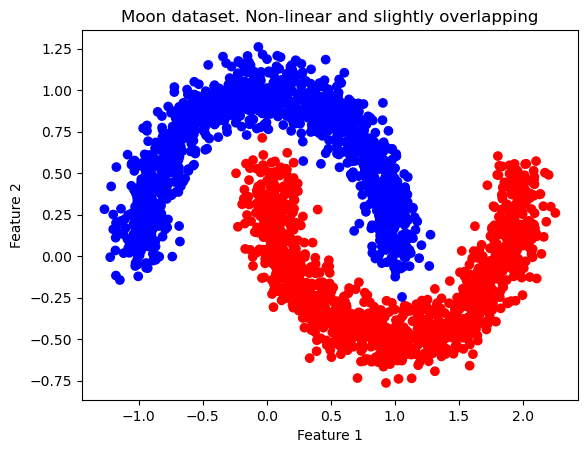

In [19]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#generate moons dataset
X, Y = make_moons(
    n_samples=2500,   # number of data points
    noise=0.1,        # This will add slight overlap
    random_state=1
)

#keep X as (2500, 2) for row = data points, column = features
Y = Y.reshape(-1, 1)  # shape: (2500, 1)

#visualize
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap='bwr')
plt.title("Moon dataset. Non-linear and slightly overlapping")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### **3.2 - Network Architecture**

To make things consistant, a function will defined for the network architecture. 

In [22]:
def network_architecture(X, Y):
    n_x = X.shape[1]  # number of input features
    n_h = 2            # hidden layer neurons
    n_y = Y.shape[1]   # output neurons
    return (n_x, n_h, n_y)


### **3.3 - Parameters Initialization**

Next, a function will be defined that initializes the parameters of the network. There are several strategies for initialization, but given the network's architecture, we will start with a simple approach and see how things turn out: weights will be initialized as random numbers drawn from a standard normal distribution, scaled down by a default factor of 0.01, and biases will be initialized to a default of 0.

In [25]:
def initialization(n_x, n_h, n_y, W_factor=0.01, b_factor=0):
    # 2x2 weight matrix for hidden layer, random numbers from standard normal distribution
    W1 = np.random.randn(n_x, n_h) * W_factor

    # 1x2 bias vector for hidden layer, initialized to zeros
    b1 = np.zeros((1, n_h)) + b_factor

    # 2x1 weight matrix for output layer, random numbers from standard normal distribution
    W2 = np.random.randn(n_h, n_y) * W_factor

    # 1x1 bias vector for output layer, initialized to zeros
    b2 = np.zeros((1, n_y)) + b_factor

    # Store parameters in a dictionary for easy access
    parameters = { 
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters


### **3.4 - Activation Functions**

Next, functions will be defined for the activation functions. 

In [28]:

def relu_forward(Z):
    # ReLU activation: replaces negative values in Z with 0, keeps positive values unchanged
    return np.maximum(0, Z)


def sigmoid_forward(Z):
    # Sigmoid activation: maps any real number Z to a value between 0 and 1
    return 1 /(1+np.exp(-Z))

        

### **3.5 - Forward Propigation in Code**

Now, a function will be defined for the forward propagation. It will reflect how we defined forward propagation mathematically, but using vectorized operations, meaning, we switched $WX+b$ to be $XW+b$. This function will accept the dataset $X$ and the parameters, and will produce the prediction of the network. Additionally, the intermediate values will be stored to be used later in back propagation.

In [31]:
def forward_propagation(X, parameters):
    #retrieve parameters for readability
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #hidden layer affine combination
    Z1 = X @ W1 + b1
    
    #hidden layer activation (ReLU)
    A1 = relu_forward(Z1)
    
    #output layer affine combination
    Z2 = A1 @ W2 + b2
    
    #output layer activation (Sigmoid)
    Y_hat = sigmoid_forward(Z2)
    
    #store intermediate values in cache for backpropagation
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "Y_hat": Y_hat
    }
    
    return Y_hat, cache


### **3.6 - Loss Function**

Next, we will define a function for binary cross-entropy.

In [34]:
def loss_function(Y_hat,Y):
    #will accept the the predicted and the true label and return the error
    m = Y.shape[0]
    loss = 1/m * np.sum(-(Y*np.log(Y_hat)+(1-Y)*np.log(1-Y_hat)))
    return loss

### **3.7 - Sanity Check: Forward Propigation**

With the forward propagation implemented fully, we will now test it to ensure everything is functioning correctly.

In [37]:
Y_hat_test, cache_test = forward_propagation(X, initialization(*network_architecture(X, Y)))
forward_test = loss_function(Y_hat_test,Y)
print(f"The mean loss is: {forward_test}")
print(f"The shape of Z1 {cache_test['Z1'].shape}")


The mean loss is: 0.6930730071360695
The shape of Z1 (2500, 2)


This indicates that the forward propagation function is working as intended.

### **3.8 - Backward Propigation in Code**

Now, a function will be defined for backward propagation. It will accept the parameters, the cache from forward propagation, the input $X$, and the true labels $Y$.

These will be translated in code:
- Output layer gradients:

$$
dZ^{[2]} = \hat{Y} - Y
$$

$$
\nabla W^{[2]} = \frac{1}{m} (A^{[1]})^T dZ^{[2]}
$$

$$
\nabla b^{[2]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[2]}_i
$$

- Hidden layer gradients:

$$
dZ^{[1]} = (dZ^{[2]} W^{[2]T}) \odot g'(Z^{[1]})
$$

$$
\nabla W^{[1]} = \frac{1}{m} X^T dZ^{[1]}
$$

$$
\nabla b^{[1]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[1]}_i
$$

In [41]:
def backward_propagation(parameters, cache, X, Y):
    #retrieve parameters
    W2 = parameters["W2"]

    #retrieve cache
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Y_hat = cache["Y_hat"]
    m = X.shape[0]

    #gradients of the output layer
    dZ2 = Y_hat - Y
    dW2 = 1/m * (A1.T @ dZ2)
    db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)

    #gradients of the hidden layer
    dZ1 = (dZ2 @ W2.T) * (Z1 > 0)
    dW1 = 1/m * (X.T @ dZ1)
    db1 = 1/m * np.sum(dZ1, axis=0, keepdims=True)

    #store the gradients in a dictionary
    gradients = {
        "dZ2": dZ2,
        "dW2": dW2,
        "db2": db2,
        "dZ1": dZ1,
        "dW1": dW1,
        "db1": db1
    }
    return gradients


### **3.9 - Updating the Parameters: Gradient Descent in Code**


Now that we have the gradients, a function will be defined to update the parameters $\theta$ using gradient descent with the following formula:

$$
\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla \mathcal{L}(\theta_{\text{old}})
$$

The function will accept the gradients and the old parameters and will return the updated parameters.



In [44]:
def gradient_descent(parameters, gradients, learning_rate=0.001):
    #retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    #retrieve gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    #update parameters using gradient descent
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    #store updated parameters in a dictionary
    parameters = { 
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters


### **3.10 - Buliding the Model**

A class will be defined with two primary methods: one for training the model and storing its parameters, and another for making predictions using the trained model.

In [47]:
class Model:
    #this method will be used to train the model
    def fit(self, X, Y, epoch, learning_rate=0.01, W_factor=0.01, b_factor=0, print_loss=False, print_parameters=False):
        #check to see if the shape of X and Y match before anything
        assert X.shape[0] == Y.shape[0]
        #define the network architecture
        n_x, n_h, n_y = network_architecture(X, Y)

        #initialize the network parameters (weights and biases)
        parameters = initialization(n_x, n_h, n_y, W_factor=0.01, b_factor=0)

        #training loop
        for i in range(epoch):
            # Forward propagation: compute predictions and cache intermediate values
            Y_hat, cache = forward_propagation(X, parameters)

            #compute the loss for this iteration
            loss = loss_function(Y_hat, Y)

            #backward propagation: compute gradients w.r.t. parameters
            gradients = backward_propagation(parameters, cache, X, Y)

            #update parameters using gradient descent
            parameters = gradient_descent(parameters, gradients, learning_rate)

            #print loss to see how the model improves between iterations
            if print_loss:
                print(f"The loss of iteration number {i} is {loss}")

        #store the trained parameters as an instance variable to be used in the prediction method
        self.model_parameters = parameters

        #print parameters to see the model parameters
        if print_parameters:
            print(f"The model parameters are {self.model_parameters}")

    def predict(self, X):
        #this method accepts the input data and returns the predictions using the trained model parameters
        Y_hat, _ = forward_propagation(X, self.model_parameters)
        #convert probabilities to class labels: if Y_hat >= 0.5 → class 1, else class 0
        return (Y_hat >= 0.5).astype(int)


---
*This concludes code implementaion. Next will be model traninin and evaluation.*

## **4 - Model Training and Evaluation**

### **4.1 - Model Training**

The data will be split into training and testing sets.

In [52]:
from sklearn.model_selection import train_test_split

#split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#initialize the model
model = Model()


In [53]:
model.fit(X_train,Y_train, epoch=1000, print_loss=True, print_parameters=True )

The loss of iteration number 0 is 0.6931622753740543
The loss of iteration number 1 is 0.6931617038715322
The loss of iteration number 2 is 0.6931611344284893
The loss of iteration number 3 is 0.693160567031475
The loss of iteration number 4 is 0.6931600016653615
The loss of iteration number 5 is 0.6931594382983535
The loss of iteration number 6 is 0.6931588769362945
The loss of iteration number 7 is 0.6931583175415406
The loss of iteration number 8 is 0.6931577600934108
The loss of iteration number 9 is 0.6931572045965914
The loss of iteration number 10 is 0.6931566510853293
The loss of iteration number 11 is 0.6931560995148566
The loss of iteration number 12 is 0.6931555498721259
The loss of iteration number 13 is 0.6931550021441344
The loss of iteration number 14 is 0.693154456317923
The loss of iteration number 15 is 0.6931539123805768
The loss of iteration number 16 is 0.6931533703192239
The loss of iteration number 17 is 0.6931528301210359
The loss of iteration number 18 is 0.693

In [54]:
def loss_reduction(first, last):
    percent = abs(first - last) / first * 100
    print(f"{percent:.4f}%")


In [102]:
loss_reduction(0.6931622753740543, 0.6912197552800503)

0.2802%


There is a steady but very small reduction in loss, approximately 0.28%. This is likely due to the small learning rate, which was set to the default value of 0.01. We will increase it to 0.1 and observe how things turn out.

In [57]:
model.fit(X_train,Y_train, epoch=1000, learning_rate=0.1, print_loss=True, print_parameters=True )

The loss of iteration number 0 is 0.6931451850006322
The loss of iteration number 1 is 0.6931411915519783
The loss of iteration number 2 is 0.6931373698514328
The loss of iteration number 3 is 0.6931337114593219
The loss of iteration number 4 is 0.6931302072330382
The loss of iteration number 5 is 0.6931268525369935
The loss of iteration number 6 is 0.6931236345551647
The loss of iteration number 7 is 0.693120548064024
The loss of iteration number 8 is 0.6931175849798277
The loss of iteration number 9 is 0.6931147388452422
The loss of iteration number 10 is 0.693112007823481
The loss of iteration number 11 is 0.6931093842169601
The loss of iteration number 12 is 0.6931068588532763
The loss of iteration number 13 is 0.6931044260914349
The loss of iteration number 14 is 0.6931020784899468
The loss of iteration number 15 is 0.693099813658707
The loss of iteration number 16 is 0.6930976239011989
The loss of iteration number 17 is 0.6930955041953148
The loss of iteration number 18 is 0.6930

In [105]:
loss_reduction(0.6912197552800503, 0.258226029833831)

62.6420%


Compared to the last run, the loss reduction is approximately 62.64%. During the first ~200 iterations, the loss decreases steadily with slight acceleration. It then begins to decrease more rapidly, with most of the reduction occurring between the ~160th and ~500th iterations, after which the decrease slows down. This behavior may indicate that the model is approaching convergence. As a final adjustment, the learning rate will be increased to 0.12 and the number of epochs to 1500.

In [60]:
model.fit(X_train,Y_train, epoch=1500, learning_rate=0.12, print_loss=True, print_parameters=True )

The loss of iteration number 0 is 0.6931364515401792
The loss of iteration number 1 is 0.6931260641805969
The loss of iteration number 2 is 0.6931159838412371
The loss of iteration number 3 is 0.6931061069500892
The loss of iteration number 4 is 0.6930963683537609
The loss of iteration number 5 is 0.6930867392032002
The loss of iteration number 6 is 0.6930771766070934
The loss of iteration number 7 is 0.6930676491862855
The loss of iteration number 8 is 0.6930581208531434
The loss of iteration number 9 is 0.6930485607305089
The loss of iteration number 10 is 0.6930389349646549
The loss of iteration number 11 is 0.6930292120069254
The loss of iteration number 12 is 0.693019359681005
The loss of iteration number 13 is 0.693009345113732
The loss of iteration number 14 is 0.692999135112104
The loss of iteration number 15 is 0.6929886962195587
The loss of iteration number 16 is 0.6929779937372411
The loss of iteration number 17 is 0.6929669922012113
The loss of iteration number 18 is 0.6929

In [111]:
loss_reduction(0.26629078019335817, 0.25213848244860154)

5.3146%


The increase in the learning rate led to faster convergence, which can be seen in the plateau of the loss at approximately 0.26 after around 600 iterations. Given the model architecture, this is a sign of underfitting. The reduction in loss between the 600th and 1499th iterations is approximately 5%, indicating that the model has reached its limit and has effectively converged. The code was run several times, yielding very similar results, except for the parameters, which differ between runs. This occurs because neural networks can be viewed as a system of equations: many different sets of parameters can produce the same output or loss. This is similar to a redundant system, where infinitely many solutions exist. For example:

$$
x + y = 0
$$

The possible combinations of values for $x$ and $y$ that satisfy this equation are effectively infinite.

### **4.2 - Model Evaluation**

Next, the decision boundaries will be visualized and the model’s performance metrics will be examined

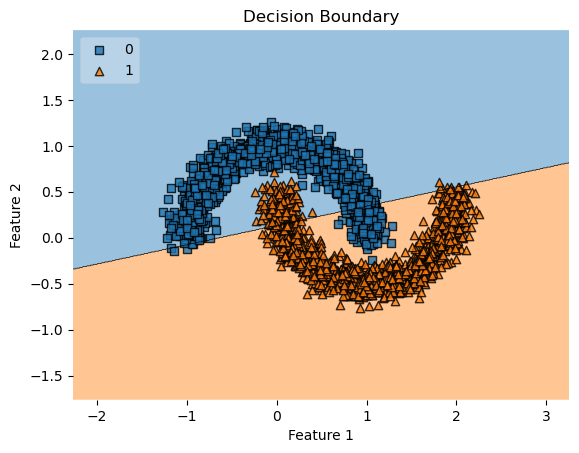

In [65]:
from mlxtend.plotting import plot_decision_regions

#this will visulize the decision boundary
y_flat = Y.flatten().copy()  

plot_decision_regions(X=X, y=y_flat, clf=model, legend=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#predictions
y_pred = model.predict(X_test)


#accuracy
acc = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {acc}")

#confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#full classification report
print(classification_report(Y_test, y_pred))


Accuracy: 0.88
Confusion Matrix:
[[216  22]
 [ 38 224]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       238
           1       0.91      0.85      0.88       262

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500




Despite the clear underfitting, the model achieved 88% accuracy on the test set.

- Class 0: Out of 238 test samples, it correctly classified 216 and misclassified 22.
- Class 1: Out of 262 test samples, it correctly classified 224 and misclassified 38.

Both classes have an F1-score of 0.88, showing that the model balances precision and recall and does not favor one class over the other, that means , on average, the model is 88% effective at both correctly identifying positives (recall) and ensuring its positive predictions are correct (precision).

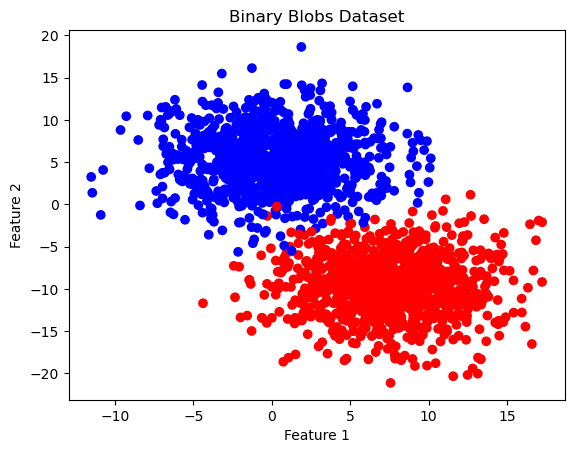

In [114]:
from sklearn.datasets import make_blobs

#binary blobs dataset
X2, Y2 = make_blobs(
    n_samples=2000,       # total points
    centers=2,            # 2 classes
    cluster_std=3.5,      # spread of clusters
    random_state=14
)


Y2 = Y2.reshape(-1, 1)


plt.scatter(X2[:, 0], X2[:, 1], c=Y2.flatten(), cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Blobs Dataset")
plt.show()


In [116]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

model2=Model()

In [118]:
model2.fit(X2_train,Y2_train, epoch=1500, learning_rate=0.12, print_loss=True, print_parameters=True )

The loss of iteration number 0 is 0.6929146874614542
The loss of iteration number 1 is 0.6923189963198095
The loss of iteration number 2 is 0.6914848283905757
The loss of iteration number 3 is 0.6900701667569739
The loss of iteration number 4 is 0.6875432352156048
The loss of iteration number 5 is 0.683013438862165
The loss of iteration number 6 is 0.6749918444451669
The loss of iteration number 7 is 0.6611515600194804
The loss of iteration number 8 is 0.638386296379839
The loss of iteration number 9 is 0.6039411277985152
The loss of iteration number 10 is 0.5584495370835711
The loss of iteration number 11 is 0.508915707772839
The loss of iteration number 12 is 0.4653484632020553
The loss of iteration number 13 is 0.43254762655117285
The loss of iteration number 14 is 0.40902134591378764
The loss of iteration number 15 is 0.39162878397640327
The loss of iteration number 16 is 0.3779921381673211
The loss of iteration number 17 is 0.3666995425839441
The loss of iteration number 18 is 0.3

In [120]:
y2_pred = model2.predict(X2_test)


#accuracy
acc = accuracy_score(Y2_test, y2_pred)
print(f"Accuracy: {acc}")

#confusion Matrix
cm = confusion_matrix(Y2_test, y2_pred)
print("Confusion Matrix:")
print(cm)

#full classification report
print(classification_report(Y2_test, y2_pred))

Accuracy: 0.99
Confusion Matrix:
[[179   3]
 [  1 217]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.99      1.00      0.99       218

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



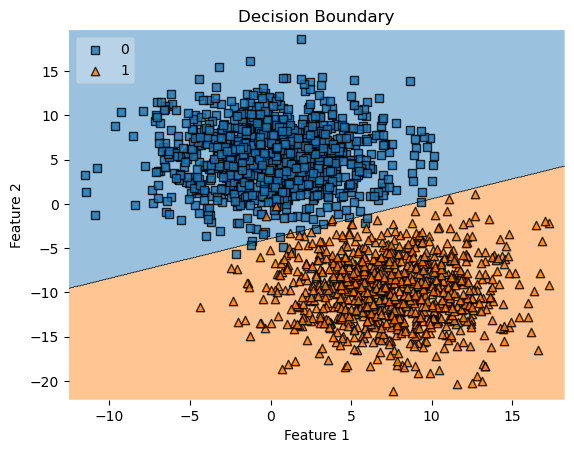

In [122]:
y2_flat = Y2.flatten().copy()  

plot_decision_regions(X=X2, y=y2_flat, clf=model2, legend=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

### **4.3 - Conclusion**

The results of the previous tests are as expected. With linear data, the model was able to separate the classes quite easily. Given the simplicity of the data, which is linearly separable, the network performed well. However, for non-linear data, the model underfitted. This can be attributed to the network architecture: with only two hidden neurons, it cannot bend the decision boundary significantly, meaning it is incapable of expressing complex nonlinear relationships. This limitation explains why the network performs better on linear tasks—its capacity matches the simplicity of the problem. The reason for this can be thought of as shallow networks trying to approximate functions by partitioning the regions into spaces relatively proportional to the number of hidden neurons. Each neuron acts like a separate line, and during training, the network tries to glue these lines together. In this network, we have two hidden neurons with ReLU activations, so the maximum theoretical limit of this network is dividing the space into 4 subregions, which is $2^n$, where $n$ is the number of neurons, in a shape similar to the letter X—two lines intersect and four regions form. Although there are subtleties that might be better discussed in a separate notebook, this brings this notebook to a close.

---
*This concludes the notebook.*